In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = 'bank.csv'
#read csv file
df= pd.read_csv(file, sep = ';', quotechar = '"')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


## 1.EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [4]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4521.0,41.170095,10.576211,19.0,33.0,39.0,49.0,87.0
balance,4521.0,1422.657819,3009.638142,-3313.0,69.0,444.0,1480.0,71188.0
day,4521.0,15.915284,8.247667,1.0,9.0,16.0,21.0,31.0
duration,4521.0,263.961292,259.856633,4.0,104.0,185.0,329.0,3025.0
campaign,4521.0,2.793630,3.109807,1.0,1.0,2.0,3.0,50.0
pdays,4521.0,39.766645,100.121124,-1.0,-1.0,-1.0,-1.0,871.0
previous,4521.0,0.542579,1.693562,0.0,0.0,0.0,0.0,25.0


In [6]:
df.shape

(4521, 17)

In [7]:
print(df.job.value_counts())
print('\n',df.marital.value_counts())
print('\n',df.education.value_counts())
print('\n',df.default.value_counts())
print('\n',df.housing.value_counts())
print('\n',df.loan.value_counts())
print('\n',df.contact.value_counts())
print('\n',df.month.value_counts())
print('\n',df.poutcome.value_counts())

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

 married     2797
single      1196
divorced     528
Name: marital, dtype: int64

 secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64

 no     4445
yes      76
Name: default, dtype: int64

 yes    2559
no     1962
Name: housing, dtype: int64

 no     3830
yes     691
Name: loan, dtype: int64

 cellular     2896
unknown      1324
telephone     301
Name: contact, dtype: int64

 may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb     222
jan     148
oct      80
sep      52
mar      49
dec      20
Name: month, dtype: int64

 unknown    3705
failure     490
other       197
success     129
Name: poutcome, dtype: int64


In [8]:
print("Number of instances", df.shape[0])
print("\nNumber of attributes", df.shape[1])
print("\nNumber of unique Values\n ", df.nunique())
print("\nNumber of null values\n", df.isnull().sum())
print("\nNumber of predicted values\n", df['y'].value_counts())

Number of instances 4521

Number of attributes 17

Number of unique Values
  age            67
job            12
marital         3
education       4
default         2
balance      2353
housing         2
loan            2
contact         3
day            31
month          12
duration      875
campaign       32
pdays         292
previous       24
poutcome        4
y               2
dtype: int64

Number of null values
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Number of predicted values
 no     4000
yes     521
Name: y, dtype: int64


## 2. All necessary visualizations

#### Deposits by customers

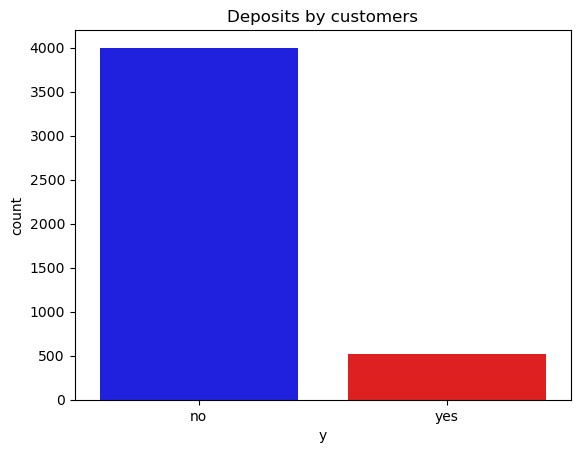

In [9]:
from matplotlib.pyplot import title as set_title
sns.countplot(x='y',data=df,palette = ['blue','red'])

set_title('Deposits by customers')

plt.show()

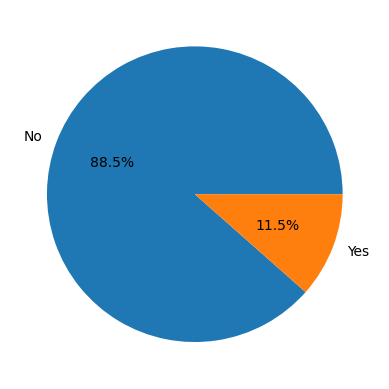

In [10]:
plt.pie(df['y'].value_counts(),autopct='%.1f%%', labels=['No','Yes'])
plt.show()

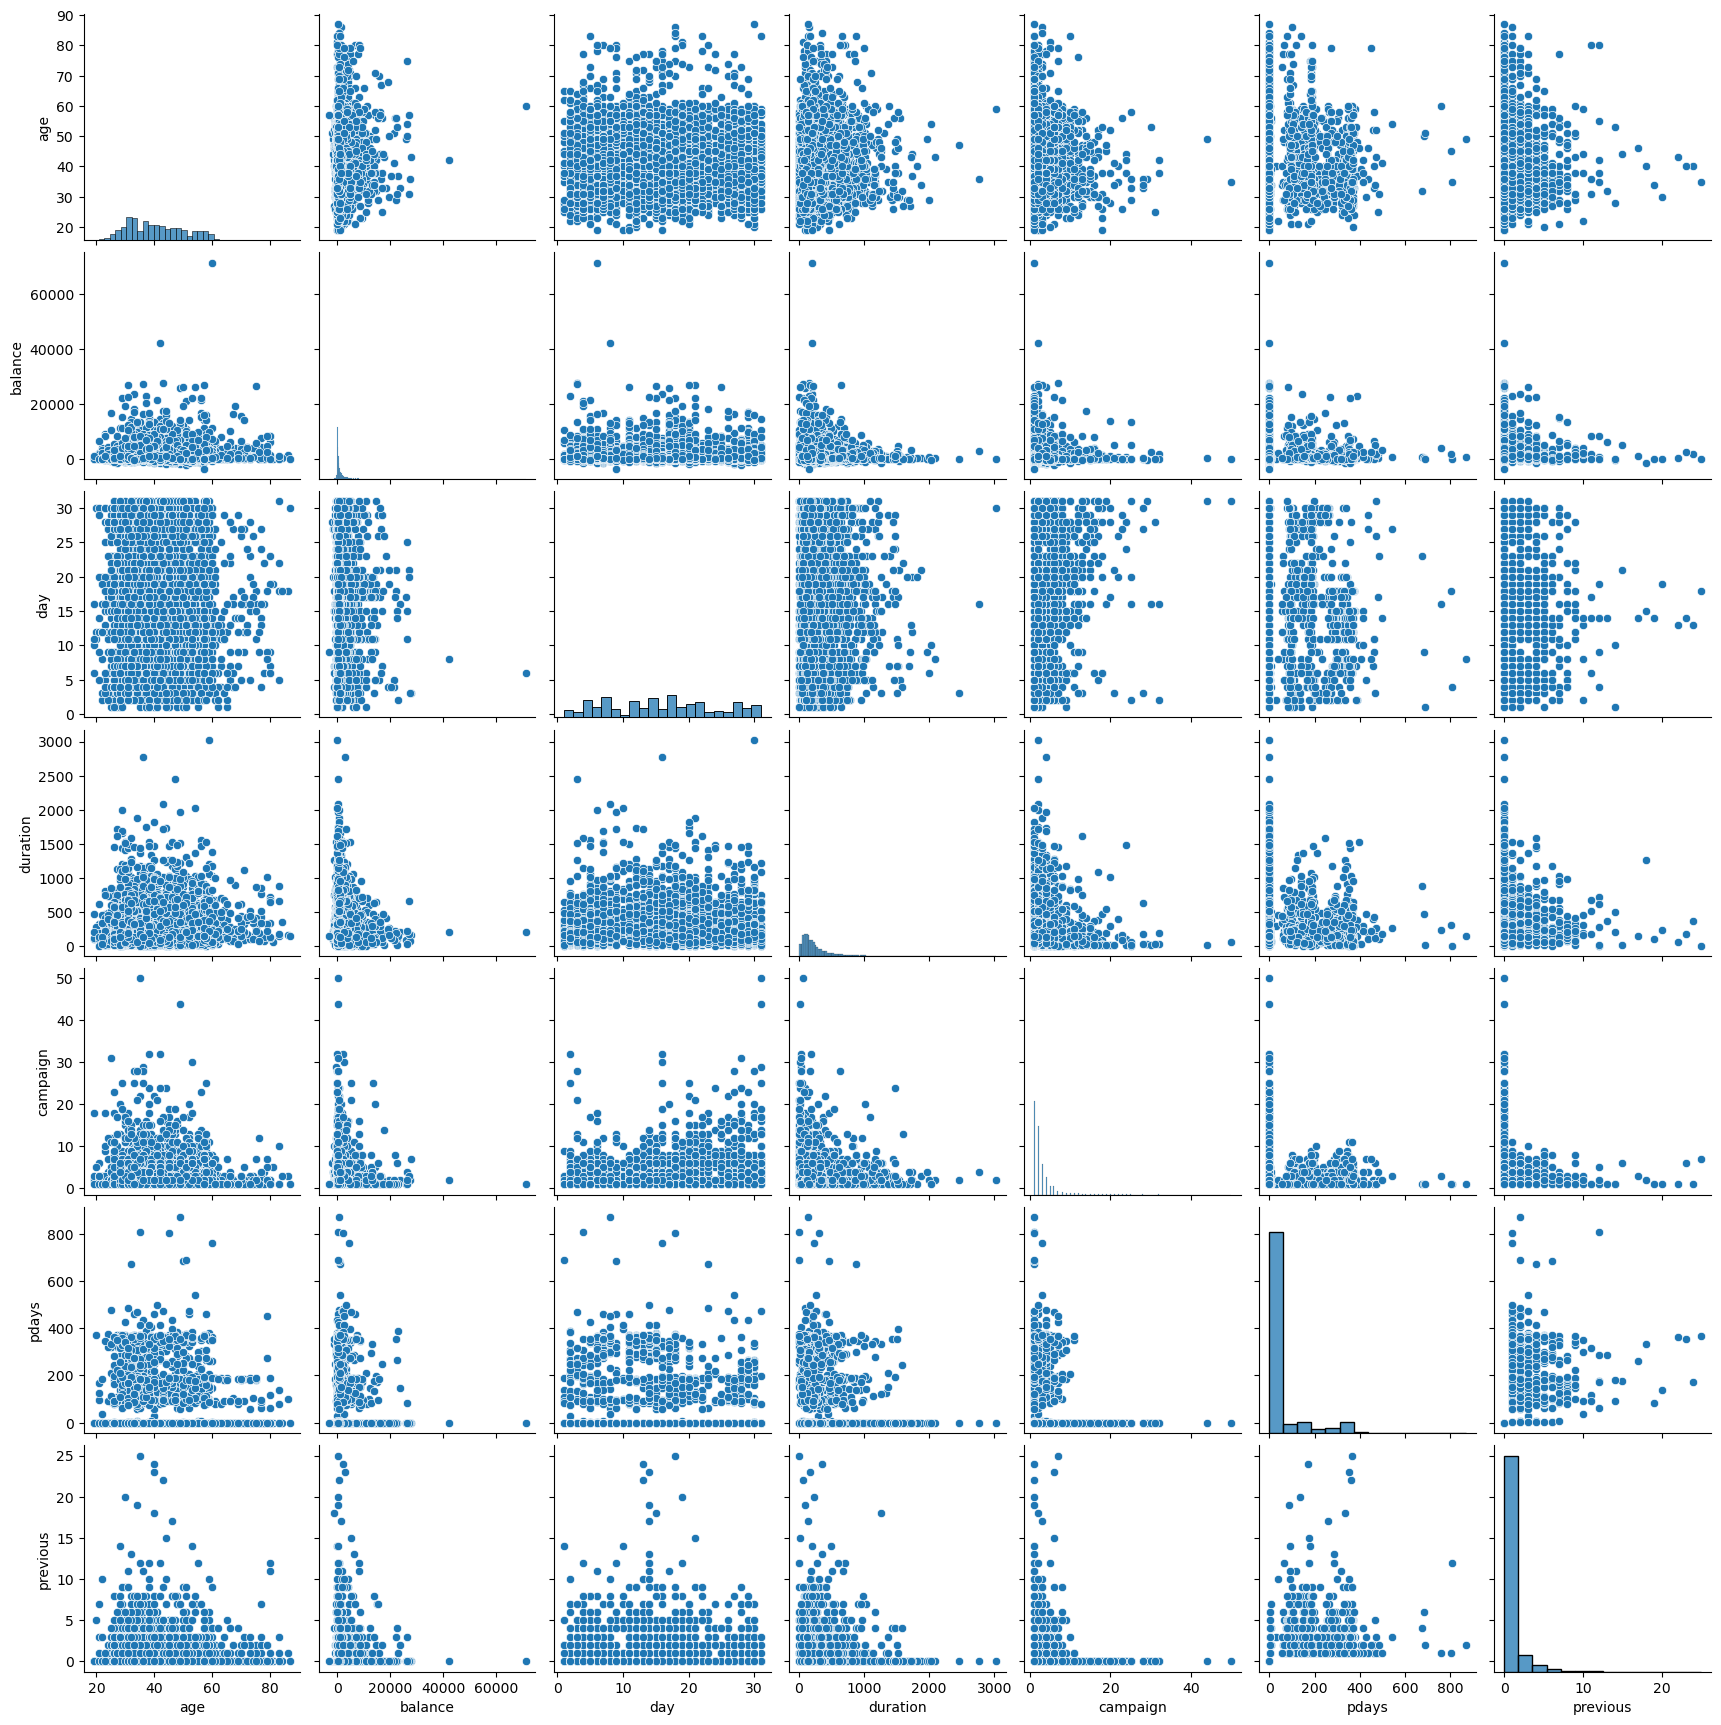

In [11]:
sns.pairplot(data=df)

#### Nan Values plotting

In [12]:
df.replace('unknown',np.nan , inplace = True)

age             0
job            38
marital         0
education     187
default         0
balance         0
housing         0
loan            0
contact      1324
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     3705
y               0
dtype: int64


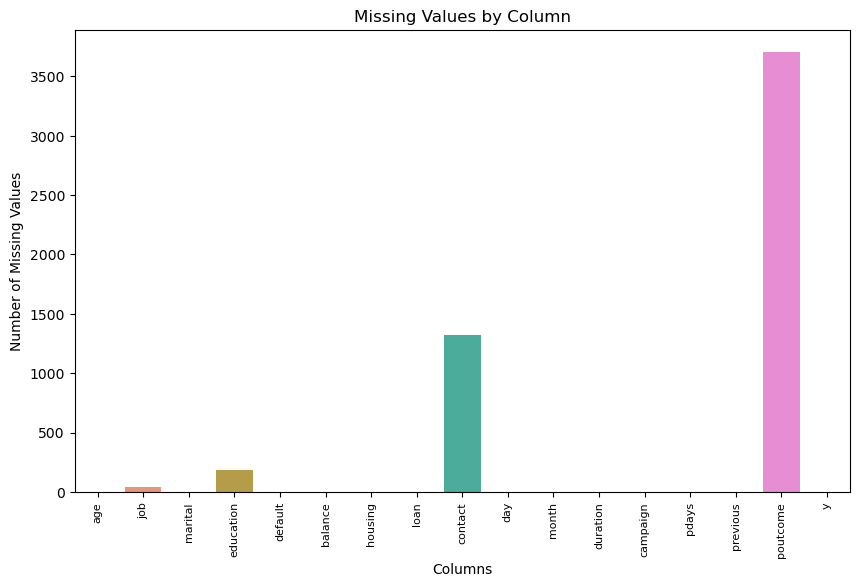

In [13]:
#Plotting NaN values
missing_counts = df.isnull().sum()
plt.figure(figsize=(10, 6))
b = sns.barplot(x=missing_counts.index, y=missing_counts.values)
b.set(xlabel='Columns', ylabel='Number of Missing Values')
plt.title('Missing Values by Column')
plt.xticks(rotation=90, fontsize=8)  # Adjust fontsize for readability

print(df.isnull().sum())
plt.show()

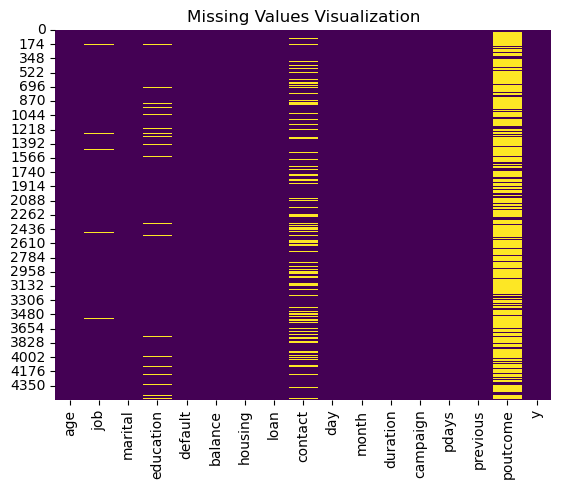

In [14]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Visualization')
plt.show()

#### Visualization of each data given in the dataset

Text(0, 0.5, 'Frequency of Purchase')

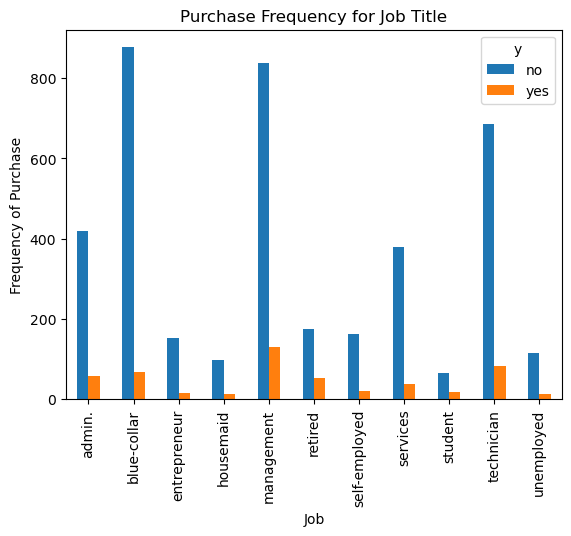

In [15]:
%matplotlib inline
pd.crosstab(df.job,df.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')

Text(0, 0.5, 'Proportion of Customers')

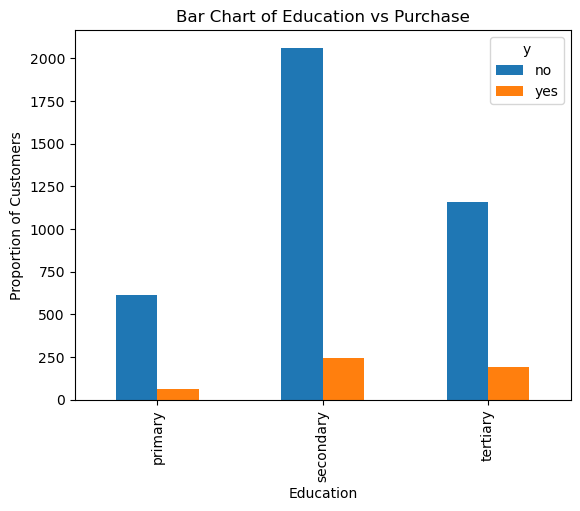

In [16]:
pd.crosstab(df.education,df.y).plot(kind='bar')
plt.title('Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')

Text(0, 0.5, 'Proportion of Customers')

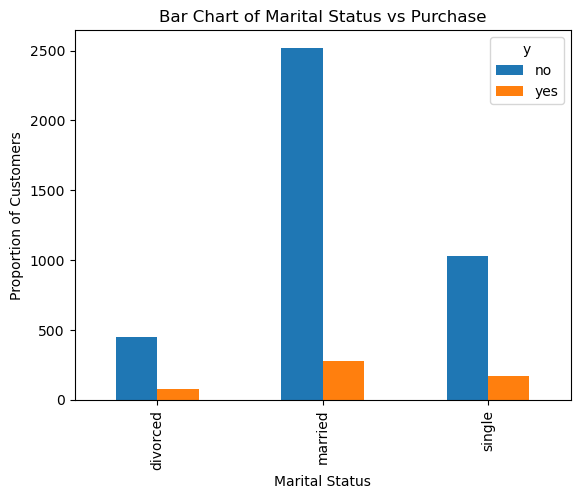

In [17]:
pd.crosstab(df.marital,df.y).plot(kind='bar')
plt.title('Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')

Text(0, 0.5, 'Frequency of Purchase')

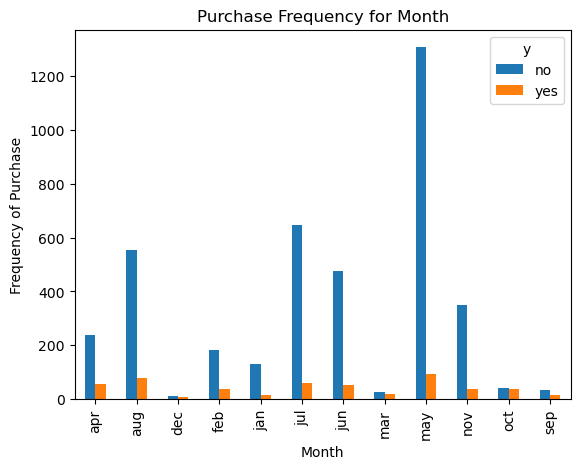

In [18]:
pd.crosstab(df.month,df.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')

Text(0, 0.5, 'Frequency')

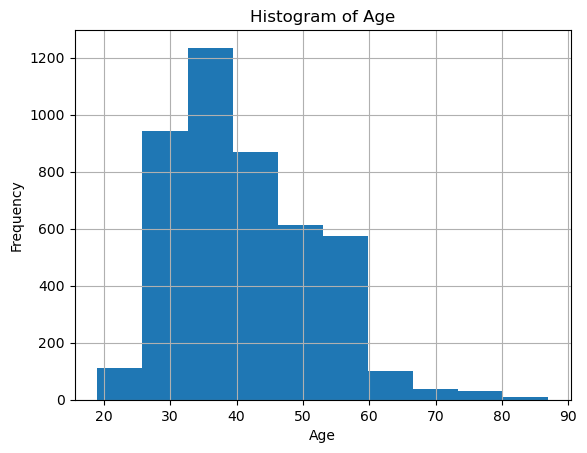

In [19]:
df.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency of Purchase')

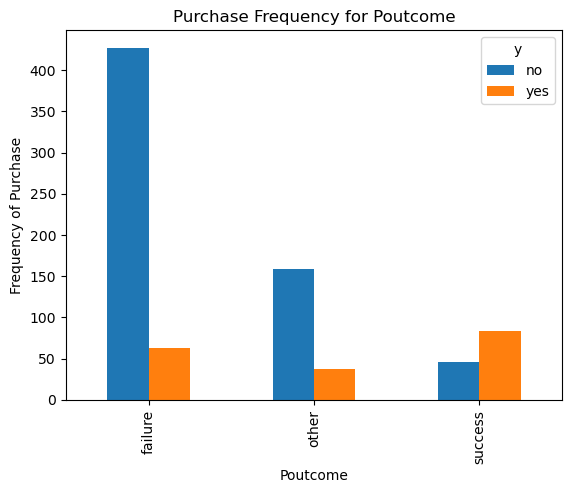

In [20]:
pd.crosstab(df.poutcome,df.y).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')

## 3.Model fitting and Performance Evaluation

#### Using label encoder to convert object into numerical values.

In [21]:
from sklearn.preprocessing import LabelEncoder

#perform label encoding 
df[['jobs','maritals','educations','contacts','months','poutcomes',"y_n"]] = df[['job','marital','education','contact','month','poutcome','y']].apply(LabelEncoder().fit_transform)

In [22]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,...,previous,poutcome,y,jobs,maritals,educations,contacts,months,poutcomes,y_n
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,...,0,NaN,no,10,1,0,0,10,3,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,...,4,failure,no,7,1,1,0,8,0,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,...,1,failure,no,4,2,2,0,0,0,0
3,30,management,married,tertiary,no,1476,yes,yes,NaN,3,...,0,NaN,no,4,1,2,2,6,3,0
4,59,blue-collar,married,secondary,no,0,yes,no,NaN,5,...,0,NaN,no,1,1,1,2,8,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,...,0,NaN,no,7,1,1,0,5,3,0
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,NaN,9,...,0,NaN,no,6,1,2,2,8,3,0
4518,57,technician,married,secondary,no,295,no,no,cellular,19,...,0,NaN,no,9,1,1,0,1,3,0
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,...,3,other,no,1,1,1,0,3,1,0


In [23]:
df1 = df.drop(['job','marital','education','contact','month','poutcome','y'],axis = 1)
df1

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,jobs,maritals,educations,contacts,months,poutcomes,y_n
0,30,no,1787,no,no,19,79,1,-1,0,10,1,0,0,10,3,0
1,33,no,4789,yes,yes,11,220,1,339,4,7,1,1,0,8,0,0
2,35,no,1350,yes,no,16,185,1,330,1,4,2,2,0,0,0,0
3,30,no,1476,yes,yes,3,199,4,-1,0,4,1,2,2,6,3,0
4,59,no,0,yes,no,5,226,1,-1,0,1,1,1,2,8,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,no,-333,yes,no,30,329,5,-1,0,7,1,1,0,5,3,0
4517,57,yes,-3313,yes,yes,9,153,1,-1,0,6,1,2,2,8,3,0
4518,57,no,295,no,no,19,151,11,-1,0,9,1,1,0,1,3,0
4519,28,no,1137,no,no,6,129,4,211,3,1,1,1,0,3,1,0


#### Using map() function to convert to binary values(0,1)

In [24]:
mapping = {'yes': 1, 'no': 0}

# Use the map function along with the dictionary to convert the columns
data = df1.applymap(lambda x: mapping.get(x, x))
data

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,jobs,maritals,educations,contacts,months,poutcomes,y_n
0,30,0,1787,0,0,19,79,1,-1,0,10,1,0,0,10,3,0
1,33,0,4789,1,1,11,220,1,339,4,7,1,1,0,8,0,0
2,35,0,1350,1,0,16,185,1,330,1,4,2,2,0,0,0,0
3,30,0,1476,1,1,3,199,4,-1,0,4,1,2,2,6,3,0
4,59,0,0,1,0,5,226,1,-1,0,1,1,1,2,8,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,0,-333,1,0,30,329,5,-1,0,7,1,1,0,5,3,0
4517,57,1,-3313,1,1,9,153,1,-1,0,6,1,2,2,8,3,0
4518,57,0,295,0,0,19,151,11,-1,0,9,1,1,0,1,3,0
4519,28,0,1137,0,0,6,129,4,211,3,1,1,1,0,3,1,0


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         4521 non-null   int64
 1   default     4521 non-null   int64
 2   balance     4521 non-null   int64
 3   housing     4521 non-null   int64
 4   loan        4521 non-null   int64
 5   day         4521 non-null   int64
 6   duration    4521 non-null   int64
 7   campaign    4521 non-null   int64
 8   pdays       4521 non-null   int64
 9   previous    4521 non-null   int64
 10  jobs        4521 non-null   int64
 11  maritals    4521 non-null   int64
 12  educations  4521 non-null   int64
 13  contacts    4521 non-null   int64
 14  months      4521 non-null   int64
 15  poutcomes   4521 non-null   int64
 16  y_n         4521 non-null   int64
dtypes: int64(17)
memory usage: 600.6 KB


### Heatmap with Correlation Matrix

In [26]:
z = data.drop(['y_n'],axis=1)

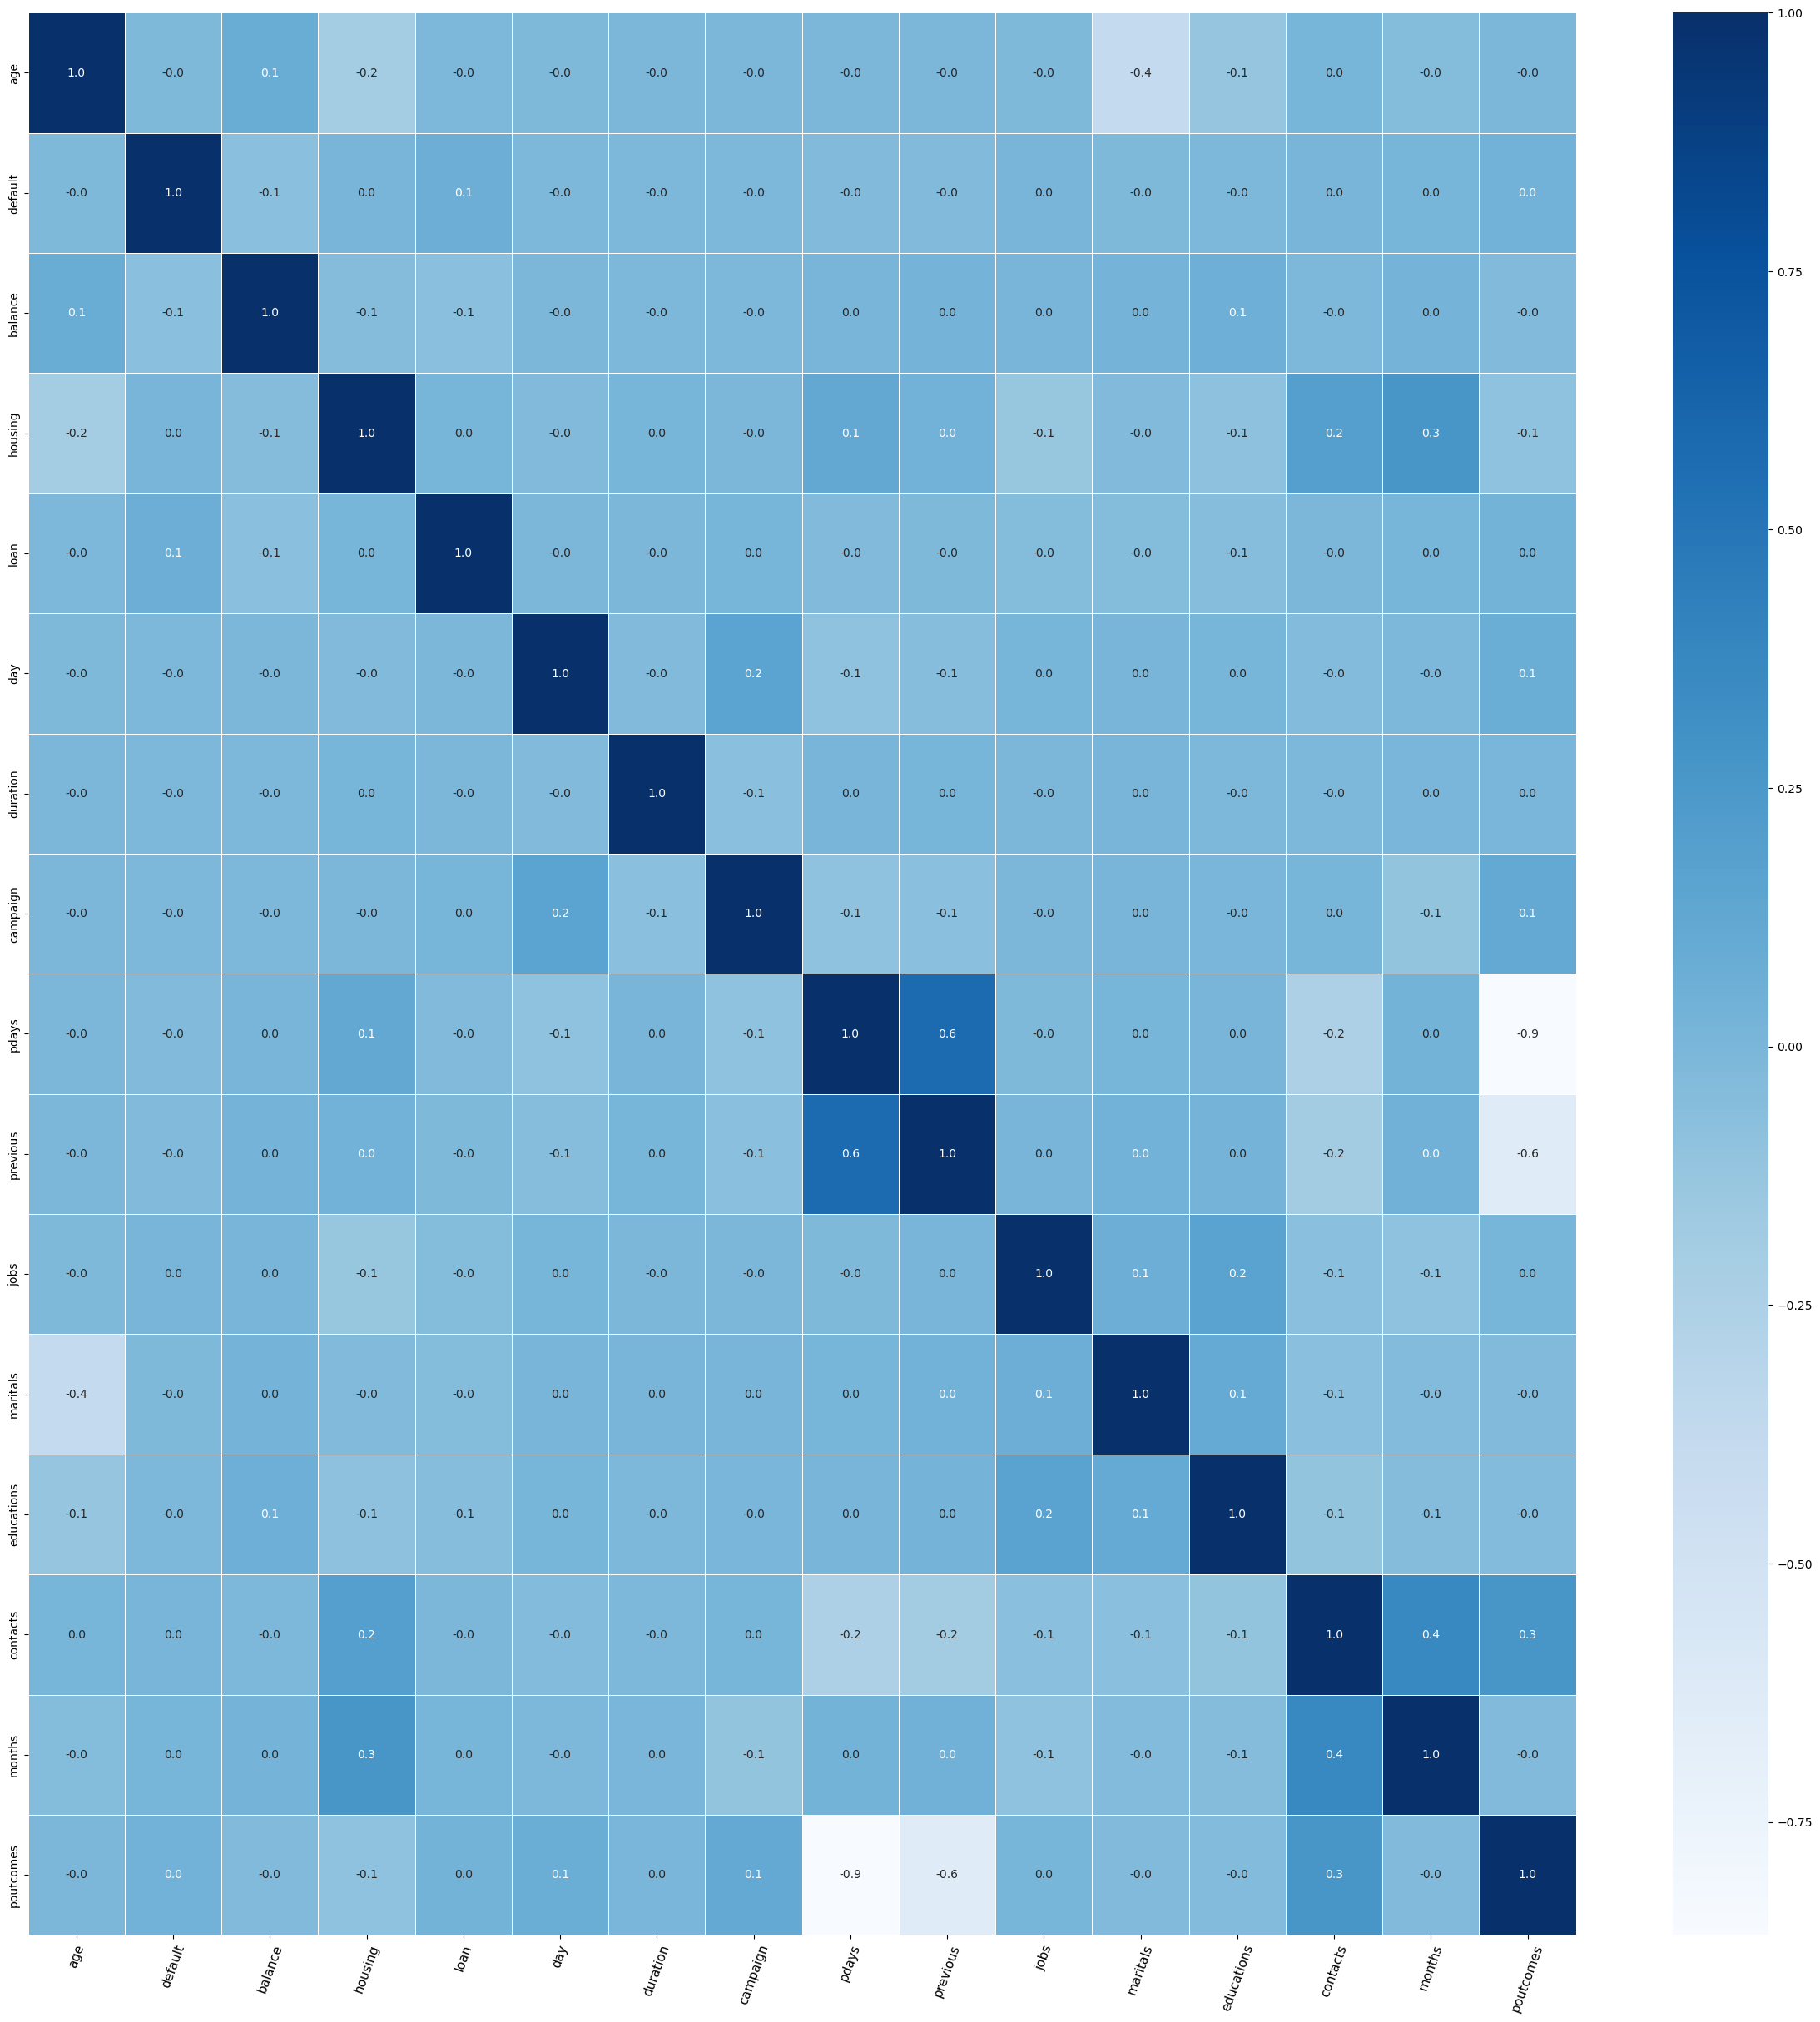

In [27]:
#correlation map
f,ax = plt.subplots(figsize=(30, 30))
sns.heatmap(z.corr(), cmap='Blues',annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.xticks(fontsize=11,rotation=70)
plt.show()

## 4. A function that takes as arguments: a model, train data, test data and returns the model's predictions on the test data.

In [28]:
x = data.drop('y_n',axis = 1)
y = data['y_n']

#### a) Decision Tree

In [29]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [30]:
model.fit(x,y)

DecisionTreeClassifier()

In [31]:
model.score(x,y)

1.0

#### b) Random Forest

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Train a logistic regression model on the training set
model = RandomForestClassifier()

model.fit(X_train, y_train)

# Make predictions on the test set
y_predict = model.predict(X_test)
y_predict

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [33]:
model.score(X_test,y_test)

0.8983425414364641

#### 10 important Feature Importance

duration      0.289414
balance       0.105746
age           0.105569
day           0.092495
months        0.079860
pdays         0.057139
jobs          0.049412
poutcomes     0.049382
campaign      0.038753
educations    0.029418
maritals      0.026396
previous      0.021902
housing       0.021067
contacts      0.020460
loan          0.010064
dtype: float64


Text(0.5, 1.0, 'Feature Importance')

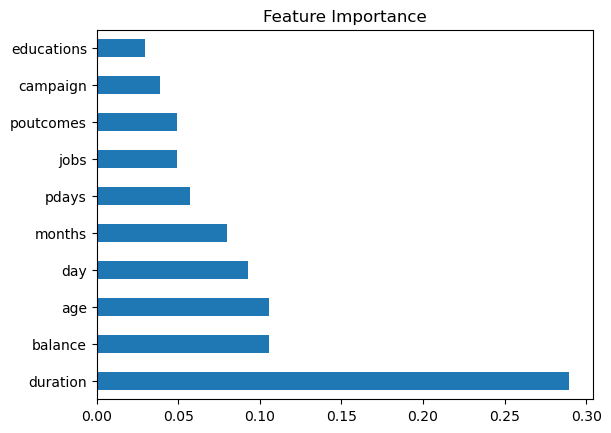

In [34]:
featuree = pd.Series(model.feature_importances_, index=model.feature_names_in_)
featuree.nlargest(10).plot(kind='barh')
print(featuree.nlargest(15))
plt.title('Feature Importance')

In [35]:
from sklearn.model_selection import train_test_split, cross_val_predict,cross_validate
Features =data.drop(columns=['contacts','housing','loan'])
x = data[Features.columns]
y = data["y_n"]

# Train Test split
train_x, test_x,train_y,test_y = train_test_split(x,y, test_size=0.2,random_state =12)

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier()
rf1.fit(train_x, train_y)

RandomForestClassifier()

In [37]:
rf1.score(test_x,test_y)

1.0

## 5. A function that takes a set of predictions and true values and that validates the predictions using appropriate metrics

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
#Predicting the test values with Model
y_prediction =  rf1.predict(test_x)
# Compute performance metrics
accuracy = accuracy_score(test_y, y_prediction)
precision = precision_score(test_y, y_prediction, average='macro')
recall = recall_score(test_y,y_prediction, average='macro')
f1 = f1_score(test_y, y_prediction, average='macro')

# Print the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, y_prediction) 
cm

array([[792,   0],
       [  0, 113]], dtype=int64)

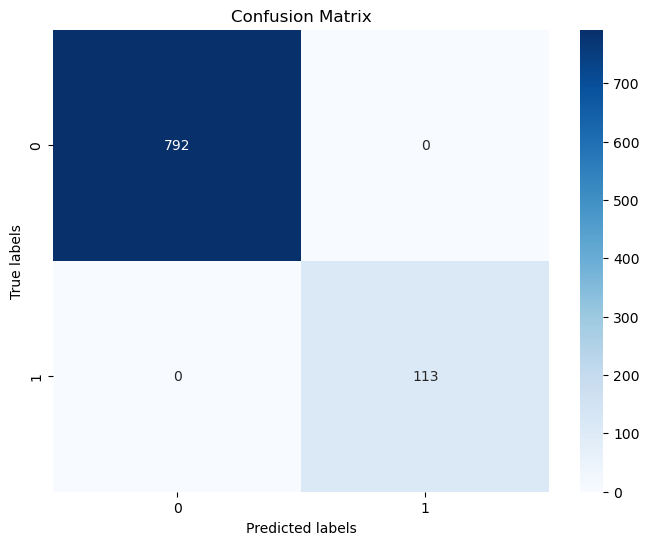

In [40]:
# Plot the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       794
           1       0.72      0.28      0.40       111

    accuracy                           0.90       905
   macro avg       0.81      0.63      0.67       905
weighted avg       0.88      0.90      0.88       905

